In [ ]:
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

#Run the below command in cmd to install those modules
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

from  IPython import display

import pathlib
import shutil
import tempfile


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

%load_ext tensorboard

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Using TensorFlow backend.


In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [ ]:
data = pd.read_csv("1997_6band.csv")
data = data.drop("Unnamed: 0", 1)
data.head()

,tnj_1997_1.1,tnj_1997_1.2,tnj_1997_1.3,tnj_1997_1.4,tnj_1997_1.5,tnj_1997_1.6,class
0,0.069165,0.060842,0.116701,0.264551,0.243472,0.171870,1
1,0.069165,0.068340,0.126251,0.308540,0.269958,0.168026,1
2,0.071015,0.060842,0.123067,0.292544,0.262012,0.171870,1
3,0.074715,0.064591,0.123067,0.236557,0.235527,0.171870,1
4,0.067315,0.064591,0.116701,0.224560,0.224932,0.160338,1


In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, -1].values

In [ ]:
for i in range(len(Y)):
    Y[i] -= 1

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3)

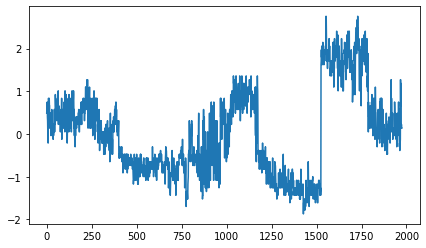

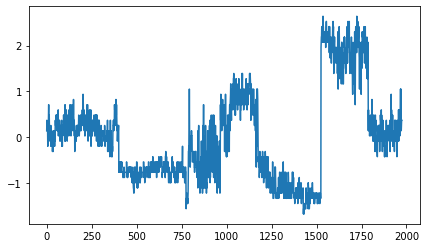

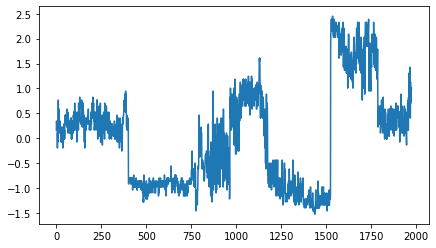

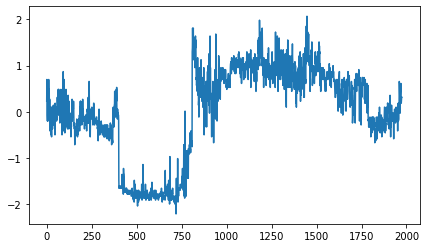

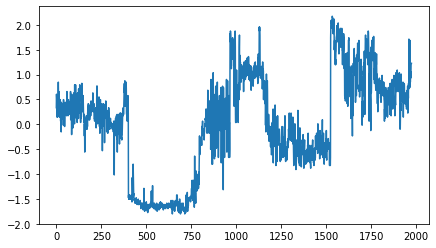

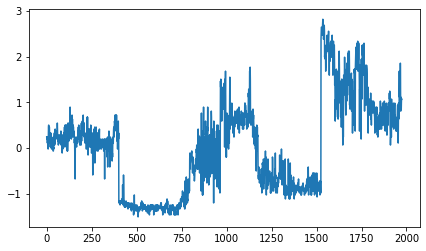

In [ ]:
for i in range(len(X[0])):
    plt.plot(X[:,i])
    plt.show()

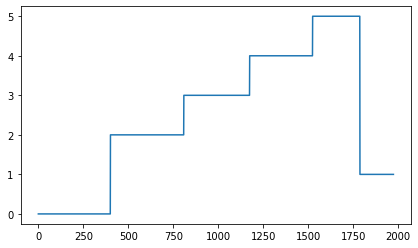

In [ ]:
plt.plot(Y)

In [ ]:
print(train_X.shape)

(1382, 6)


In [ ]:
def initial_band_model():
    inputs = keras.Input(shape = (6, ))
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(6, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="band_model")
    return model

In [ ]:
initial_model = initial_band_model()
initial_model.summary()

AttributeError: ignored

In [ ]:
initial_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = initial_model.fit(train_X, train_Y, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
18/18 [==============================] - 0s 20ms/step - loss: 1.7461 - accuracy: 0.2217 - val_loss: 1.6276 - val_accuracy: 0.5884
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 1.5875 - accuracy: 0.2633 - val_loss: 1.3112 - val_accuracy: 0.6823
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 1.4318 - accuracy: 0.4090 - val_loss: 1.0406 - val_accuracy: 0.7256
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 1.2812 - accuracy: 0.5140 - val_loss: 0.8183 - val_accuracy: 0.7112
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 1.1323 - accuracy: 0.5937 - val_loss: 0.7079 - val_accuracy: 0.7401
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 1.0378 - accuracy: 0.6344 - val_loss: 0.6368 - val_accuracy: 0.8087
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.9491 - accuracy: 0.6742 - val_loss: 0.5572 - val_accuracy: 0.8375
Epoch 8/100


Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3391 - accuracy: 0.8887 - val_loss: 0.1706 - val_accuracy: 0.9386
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.8896 - val_loss: 0.1743 - val_accuracy: 0.9350
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3236 - accuracy: 0.9014 - val_loss: 0.1826 - val_accuracy: 0.9350
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3142 - accuracy: 0.9041 - val_loss: 0.1695 - val_accuracy: 0.9350
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.8995 - val_loss: 0.1679 - val_accuracy: 0.9422
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2796 - accuracy: 0.9113 - val_loss: 0.1721 - val_accuracy: 0.9350
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2982 - accuracy: 0.9140 - val_loss: 0.1620 - val_accuracy: 0.9386
Epoch 

# Initial_band_model() Analysis
<b>We got an accuracy of 0.9422 at 100th epoch!</b>
<b>Good</b><br>Let us check our model is overfitting or not

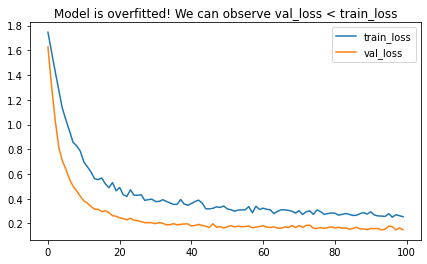

In [ ]:
plt.title("Model is overfitted! We can observe val_loss < train_loss")
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

Our model is <b>overfitted</b>, because validation loss is <b>lessthan</b> train loss 

# Avoiding Overfitting
Using <b>Regularization</b> methods we can avoid overfitting problem.<br>
Here is used <b>Dropout</b> + <b>Regularization</b> to control Overfitting.<br>
And here we will use <b>Early Stopping</b> keep monitering on <b>val_sparse_categorical_crossentropy</b>

In [ ]:
def band_model():
    inputs = keras.Input(shape = (6, ))
    x = layers.Dense(64, kernel_regularizer=regularizers.l2(0.0001), activation='relu')(inputs)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, kernel_regularizer=regularizers.l2(0.0001), activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, kernel_regularizer=regularizers.l2(0.0001), activation='relu')(x)
    outputs = layers.Dense(6, kernel_regularizer=regularizers.l2(0.0001), activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="band_model")
    return model

In [ ]:
model = band_model()
model.summary()

Model: "band_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

In [ ]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 64
STEPS_PER_EPOCH = len(train_X)//BATCH_SIZE

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

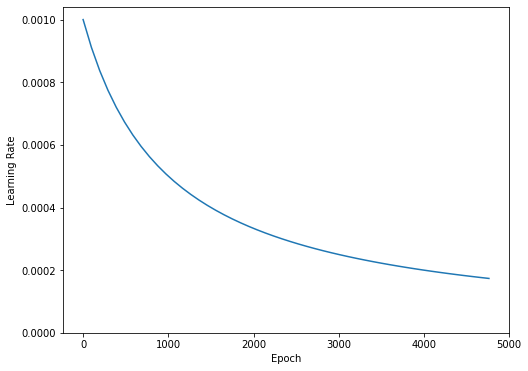

In [ ]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

In [ ]:
def get_callbacks(name):
    return [
        tfdocs.modeling.EpochDots(),
        tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_crossentropy', patience=200),
        tf.keras.callbacks.TensorBoard(logdir/name),
    ]

In [ ]:
def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True, name='sparse_categorical_crossentropy'),
                  'accuracy'])

    model.summary()

    history = model.fit(
        train_X,
        train_Y,
        steps_per_epoch = STEPS_PER_EPOCH,
        epochs=max_epochs,
        validation_split=0.2,
        callbacks=get_callbacks(name),
        verbose=0
    )
    return history

In [ ]:
size_histories = {}

In [ ]:
size_histories['large'] = compile_and_fit(model, 'sizes/large')

Model: "band_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

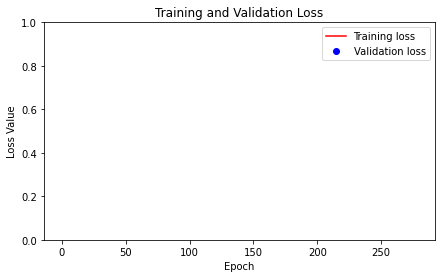

In [ ]:
loss = size_histories['large'].history['loss']
val_loss = size_histories['large'].history['val_loss']
epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

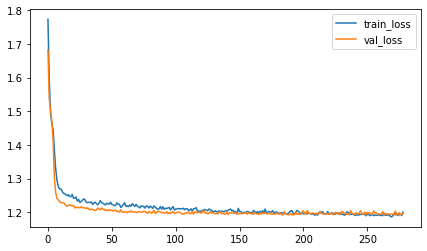

In [ ]:
plt.plot(size_histories['large'].history['loss'], label="train_loss")
plt.plot(size_histories['large'].history['val_loss'], label="val_loss")
plt.legend()

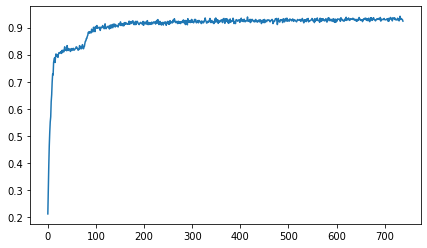

In [ ]:
plt.plot(size_histories['large'].history['accuracy'])
plt.show()

In [ ]:
%tensorboard --logdir {logdir}/sizes

Reusing TensorBoard on port 6006 (pid 1195), started 0:06:06 ago. (Use '!kill 1195' to kill it.)